In [3]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [173]:
import nltk
from nltk.corpus import stopwords

In [4]:
import warnings

In [134]:
import string

In [5]:
import json

In [6]:
from collections import defaultdict
import seaborn as sns

In [7]:
from collections import OrderedDict

In [8]:
import matplotlib.pyplot as plt

In [9]:
from functools import reduce

In [10]:
import functools
print = functools.partial(print, flush=True)

In [413]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [12]:
import moralstrength

In [13]:
import os

In [14]:
!python3 -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [15]:
import spacy
from spacy import displacy
import en_core_web_sm
import gc
import sys

In [16]:
import statistics

In [17]:
import unicodedata
import itertools

In [18]:
from moralstrength.moralstrength import estimate_morals

#### Load Morals

In [19]:
moral_list = ['authority','care', 'fairness', 'loyalty', 'purity']

In [20]:
with open('./../../../ymejova/masks/Sentiment_Moral_Lexicons/moral_dictionary.json', 'r') as fp:
    moral_dictionary = json.load(fp)

In [21]:
# fill in the missing records
for m in moral_list:
    for k1 in moral_dictionary.keys():
        if m not in moral_dictionary[k1].keys():
            moral_dictionary[k1].update({m : np.nan})

In [22]:
#sort morals in the dictionary
for k,v in moral_dictionary.items():
    d = moral_dictionary[k]
    moral_dictionary[k] = OrderedDict(sorted(d.items()))

In [23]:
def moral_estimation(message):
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        lst = []
        t = " ".join(re.findall(r"[a-zA-Z0-9]+", message))
        lem =nlp(str(t),disable=['parser', 'tagger','ner']) 
        if len([y for y in lem if not y.is_stop and y.pos_ != 'PUNCT'])!=0:
            for text in [x.lemma_ for x in [y for y in lem if not y.is_stop and y.pos_ != 'PUNCT']]:
                if text in moral_dictionary:
                    lst.append(tuple(moral_dictionary[text].values()))
                else:
                    lst.append(tuple(np.full(5, np.nan)))
            result = tuple(np.nanmean(lst, axis=0))
        else:
            result = tuple(np.full(5, np.nan))

        return(result)

### Import Dataset

In [92]:
files = os.listdir('./../data/allsides/')

In [93]:
id_ =[]
type_ =[]
df_=pd.DataFrame()
for f in files:
    id_.append(pd.Series(f).str.split('.')[0][0])
    type_.append(pd.Series(f).str.split('.')[0][1])

df_['ID'] = pd.Series(id_)
df_['Type'] = pd.Series(type_)

    

In [95]:
rightfiles = df_[df_.Type =='right'].ID
leftfiles = df_[df_.Type =='left'].ID
centerfiles = df_[df_.Type =='center'].ID
metafiles = df_[df_.Type == 'meta'].ID

### get metadata files

In [101]:
df_meta = pd.DataFrame(columns={'Allsides title:','Allsides url:','Center source:','Center url:','Date:', 'Left source:','Left url:','Right source:','Right url:','Tags:'})

In [102]:
df_list = []

for file in metafiles:
    df = pd.read_csv('./../data/extracted/'+file+'.meta',sep='\t',warn_bad_lines=False,error_bad_lines=False).T  
    df_list.append(df)

In [103]:
df_ = pd.DataFrame()
df_meta = pd.DataFrame()

for i in np.arange(0,len(df_list)):
    df_ = df_list[i]
    df_.columns = df_.iloc[0]
    df_ = df_[1:]
    df_['ID'] = metafiles.values[i]
    df_meta = df_meta.append(df_)


/home/kkalimeri/miniconda3/envs/cloneldaenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [402]:
df_meta.to_csv('./../data/allsides/OutData/metadata.csv',sep='\t')

### get rightwing

In [191]:
df_list = []

for file in rightfiles:
    df = pd.read_csv('./../data/extracted/'+file+'.right',sep='\t',header=None,warn_bad_lines=False,error_bad_lines=False, encoding = "ISO-8859-1", engine='python').T  
    df_list.append(df)

In [192]:
df_ = pd.DataFrame()
df_right = pd.DataFrame()

for i in np.arange(0,len(df_list)):
    df_ = df_list[i]
    df_['ID'] = rightfiles.values[i]
    df_right = df_right.append(df_)


In [193]:
df_right.rename(columns={0:'Title',1:'Text'},inplace=True)
df_right = df_right.reset_index()

In [403]:
df_right.to_csv('./../data/allsides/OutData/rightdata.csv',sep='\t')

### get leftwing

In [194]:
df_list = []

for file in leftfiles:
    df = pd.read_csv('./../data/extracted/'+file+'.left',sep='\t',header=None,warn_bad_lines=False,error_bad_lines=False, encoding = "ISO-8859-1", engine='python').T  
    df_list.append(df)

In [195]:
df_ = pd.DataFrame()
df_left = pd.DataFrame()

for i in np.arange(0,len(df_list)):
    df_ = df_list[i]
    df_['ID'] = leftfiles.values[i]
    df_left = df_left.append(df_)


In [196]:
df_left.rename(columns={0:'Title',1:'Text'},inplace=True)
df_left = df_left.reset_index()

In [404]:
df_left.to_csv('./../data/allsides/OutData/leftdata.csv',sep='\t')

### get center

In [197]:
df_list = []

for file in centerfiles:
    df = pd.read_csv('./../data/extracted/'+file+'.center',sep='\t',header=None,warn_bad_lines=False,error_bad_lines=False,encoding = "ISO-8859-1", engine='python').T  
    df_list.append(df)

In [198]:
df_ = pd.DataFrame()
df_center = pd.DataFrame()

for i in np.arange(0,len(df_list)):
    df_ = df_list[i]
    df_['ID'] = centerfiles.values[i]
    df_center = df_center.append(df_)


In [199]:
df_center.rename(columns={0:'Title',1:'Text'},inplace=True)

In [200]:
df_center = df_center.reset_index()

In [405]:
df_center.to_csv('./../data/allsides/OutData/centerdata.csv',sep='\t')

Allsides title:
Allsides url:
Center source:
Center url:
Date:
Left source:
Left url:
Right source:
Right url:
Tags:

### Clean the text

In [130]:
nlp = en_core_web_sm.load()

In [143]:
%%time
re_url = re.compile(r'https?:\/\/.*[\r\n]*', flags=re.U)
#re_rtw = re.compile(r'RT', flags=re.U)
re_htg = re.compile(r'#', flags=re.U) # remove hashtag sign
#re_htg = re.compile(r'#[\w]+ ?', flags=re.U)   # remove hashtags
re_hnd = re.compile(r'@\w+ ?', flags=re.U)
re_wrd = re.compile(r'[^\w]+ ', flags=re.U)
re_num = re.compile(r'[0-9]+', flags=re.U)

def preprocessing(txt):
    t = txt
    t = re_url.sub('', t)
    t = re_htg.sub('', t)
#    t = re_rtw.sub(' ', t)
    t = re_hnd.sub(' ', t)
    t = re_wrd.sub(' ', t)
    t = re_num.sub(' ', t)
    
    #t = emoji_pattern.sub(r'', t)
    #t = emoji.get_emoji_regexp().sub(r'', t)  #.decode('utf8')  # Remove emojis
   # t = emoji.demojize(t)  # Convert emojis to text
    return t.strip().lower()

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 12.4 µs


In [174]:
# cleaning master function
remove = string.punctuation
remove = remove.replace("-", "") # don't remove hyphens
pattern = r"[{}]".format(remove) # create the pattern

def clean_tweet(tweet):
    if pd.isnull(tweet):
        return(np.nan)
    else:
        
     
        tweet = re.sub(pattern, "", tweet) 

        tweet = tweet.lower() # lower case   

        tweet = ''.join([i for i in tweet if not i.isdigit()])
        tweet = _strip_accents(tweet)
        tweet = re.sub(r'&amp', 'and', tweet)
        tweet = re.sub(r'[^A-Za-z]', ' ', tweet)
        tweet = re.sub('\s+', ' ', tweet) #remove double spacing
       # tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
        tweet_token_list = [word for word in tweet.split(' ')
                                if word not in my_stopwords] # remove stopwords
        tweet = ' '.join(tweet_token_list)
        return tweet

def _strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")
    return str(text)

In [175]:
my_stopwords = nltk.corpus.stopwords.words('english')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
my_stopwords = my_stopwords + list(spacy_stopwords) 

In [201]:
df_center= df_center.iloc[df_center.Text.dropna().index]
df_left= df_left.iloc[df_left.Text.dropna().index]
df_right= df_right.iloc[df_right.Text.dropna().index]

In [203]:
df_center.loc[:,'text_p'] = df_center['Text'].map(lambda x: _strip_accents(x))
df_left.loc[:,'text_p'] = df_left['Text'].map(lambda x: _strip_accents(x))
df_right.loc[:,'text_p'] = df_right['Text'].map(lambda x: _strip_accents(x))

In [204]:
df_center['text_clean'] = df_center.text_p.apply(lambda x: clean_tweet(x))
df_left['text_clean'] = df_left.text_p.apply(lambda x: clean_tweet(x))
df_right['text_clean'] = df_right.text_p.apply(lambda x: clean_tweet(x))

### Estimate Morals

In [215]:
%%time
df_center[['care', 'fairness', 'loyalty', 'authority', 'purity']]  = estimate_morals(df_center['text_clean'], process=True) 
df_left[['care', 'fairness', 'loyalty', 'authority', 'purity']]  = estimate_morals(df_left['text_clean'], process=True) 
df_right[['care', 'fairness', 'loyalty', 'authority', 'purity']]  = estimate_morals(df_right['text_clean'], process=True) 

CPU times: user 14.2 s, sys: 0 ns, total: 14.2 s
Wall time: 14.2 s


In [216]:
df_center.head()

,index,Title,Text,ID,text_p,text_clean,care,fairness,loyalty,authority,purity
0,0,Court rules Trump administration can withhold ...,The 2nd U.S. Circuit Court of Appeals ruled We...,e4f9d8187267015720142e2c2fb5f12d,The 2nd U.S. Circuit Court of Appeals ruled We...,nd circuit court appeals ruled wednesday trump...,6.75,7.6,4.833333,8.666667,NaN
1,0,Why Hillary Clinton really might tap Elizabeth...,Elizabeth Warren endorsed Hillary Clinton on T...,628af2b23d8bc38d04af687d01df878d,Elizabeth Warren endorsed Hillary Clinton on T...,elizabeth warren endorsed hillary clinton thur...,4.00,NaN,NaN,NaN,NaN
2,0,Report: Homeland Security Secretary Kirstjen N...,President Trump unloaded on Homeland Security ...,44755416cf8cfda697c9156ef4b3e29e,President Trump unloaded on Homeland Security ...,president trump unloaded homeland security sec...,8.20,NaN,7.142857,5.777778,NaN
3,0,US election 2020: Five viral vote claims fact-...,FACT CHECKAs President Trump continues to disp...,babb9ff0914c131da1b994fc6e31c77f,FACT CHECKAs President Trump continues to disp...,fact checkas president trump continues dispute...,NaN,NaN,4.416667,8.800000,7.8
4,0,Trump's emergency declaration would trigger a ...,President Donald Trump will declare a national...,9724ccefed090920d62a535e245661d0,President Donald Trump will declare a national...,president donald trump declare national emerge...,NaN,NaN,5.200000,7.800000,NaN


In [229]:
df_center.shape,df_left.shape,df_right.shape,

((3786, 11), (3776, 11), (3784, 11))

In [258]:
df_center.head()

,index,Title,Text,ID,text_p,text_clean,care,fairness,loyalty,authority,purity
0,0,Court rules Trump administration can withhold ...,The 2nd U.S. Circuit Court of Appeals ruled We...,e4f9d8187267015720142e2c2fb5f12d,The 2nd U.S. Circuit Court of Appeals ruled We...,nd circuit court appeals ruled wednesday trump...,6.75,7.6,4.833333,8.666667,NaN
1,0,Why Hillary Clinton really might tap Elizabeth...,Elizabeth Warren endorsed Hillary Clinton on T...,628af2b23d8bc38d04af687d01df878d,Elizabeth Warren endorsed Hillary Clinton on T...,elizabeth warren endorsed hillary clinton thur...,4.00,NaN,NaN,NaN,NaN
2,0,Report: Homeland Security Secretary Kirstjen N...,President Trump unloaded on Homeland Security ...,44755416cf8cfda697c9156ef4b3e29e,President Trump unloaded on Homeland Security ...,president trump unloaded homeland security sec...,8.20,NaN,7.142857,5.777778,NaN
3,0,US election 2020: Five viral vote claims fact-...,FACT CHECKAs President Trump continues to disp...,babb9ff0914c131da1b994fc6e31c77f,FACT CHECKAs President Trump continues to disp...,fact checkas president trump continues dispute...,NaN,NaN,4.416667,8.800000,7.8
4,0,Trump's emergency declaration would trigger a ...,President Donald Trump will declare a national...,9724ccefed090920d62a535e245661d0,President Donald Trump will declare a national...,president donald trump declare national emerge...,NaN,NaN,5.200000,7.800000,NaN


In [262]:
df_center_m = df_center.loc[:,['ID','authority','care','fairness','loyalty','purity']].melt(id_vars=['ID'], value_vars=['authority','care','fairness','loyalty','purity',],
    var_name='Morals', value_name='Value')
df_left_m = df_left.loc[:,['ID','authority','care','fairness','loyalty','purity']].melt(id_vars=['ID'], value_vars=['authority','care','fairness','loyalty','purity',],
    var_name='Morals', value_name='Value')
df_right_m = df_right.loc[:,['ID','authority','care','fairness','loyalty','purity']].melt(id_vars=['ID'], value_vars=['authority','care','fairness','loyalty','purity',],
    var_name='Morals', value_name='Value')


In [263]:
df_center_m['Leaning']='Center'
df_left_m['Leaning']='Left'
df_right_m['Leaning']='Right'

In [266]:
df_allsides_m = pd.concat([df_center_m,df_left_m, df_right_m])

In [270]:
df_allsides_m = df_allsides_m.dropna()

In [417]:
colors = {'Left' : 'darkolivegreen', 'Center' : 'royalblue', 'Right' : 'firebrick'}

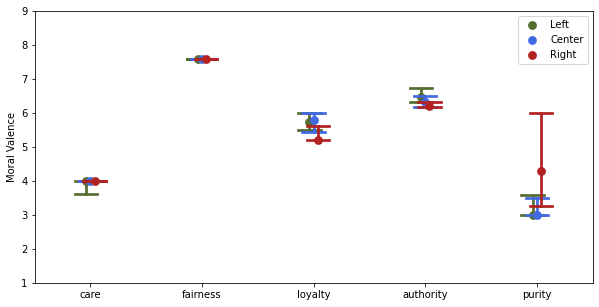

In [419]:
plt.figure(figsize=(10,5))
sns.pointplot(x =df_allsides_m.Morals, y= df_allsides_m.Value, data = df_allsides_m,hue='Leaning', hue_order =['Left','Center','Right'],dodge=True,join=False, estimator=np.median, capsize=.2,order = ['care', 'fairness', 'loyalty', 'authority', 'purity'], palette = colors )
plt.legend()
plt.ylim(1, 9)
plt.ylabel('Moral Valence')
plt.xlabel('')
plt.savefig('./../figs/allsides/TotalMedianDifferenceSides.pdf',format='pdf', transparent=True)

In [364]:
df_center_tags = df_allsides_m.merge(df_meta.loc[:,['ID','Tags:']],left_on='ID',right_on='ID')

In [365]:
df_center_tags.rename(columns={'Tags:':'Tags'},inplace=True)

In [367]:
df_center_tags = df_center_tags.iloc[df_center_tags.Tags.dropna().index]

In [420]:
for i in df_center_tags.Tags.unique():
    data = df_center_tags[df_center_tags.Tags == i]
    fig = plt.figure(figsize=(10,5))
    if (data.Leaning.unique().shape[0]==1):
        sns.pointplot(x =data.Morals, y= data.Value, data = data,dodge=True,join=False, estimator=np.median, capsize=.2,order=['care', 'fairness', 'loyalty', 'authority', 'purity'])
        plt.legend(data.Leaning.unique())
        plt.title(i)
    else:
        sns.pointplot(x =data.Morals, y= data.Value, data = data, hue= 'Leaning', hue_order =['Left','Center','Right'] , dodge=True,join=False, estimator=np.median, capsize=.2,order=['care', 'fairness', 'loyalty', 'authority', 'purity'], palette = colors )
        plt.title(i)

    plt.ylabel('Moral Valence')
    plt.ylim(0, 9)
    plt.xlabel('')
    plt.savefig('./../figs/allsides/'+str(i)+'.pdf',format='pdf', transparent=True)
    plt.close(fig)
    gc.collect()

In [421]:
gc.collect()

514760